**Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.**

**Question-1 Delivery_time -> Predict delivery time using sorting time**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Read the data file

In [3]:
delivery= pd.read_csv('delivery_time.csv')

### Examine the data

In [4]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
delivery.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Examine the null values

In [8]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Examine the duplicate values

In [9]:
delivery.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

### Rename the column name

In [10]:
delivery.rename(columns={
    'Delivery Time':'Delivery_Time',
    'Sorting Time':'Sorting_Time'
}, inplace=True)

### Plot the data

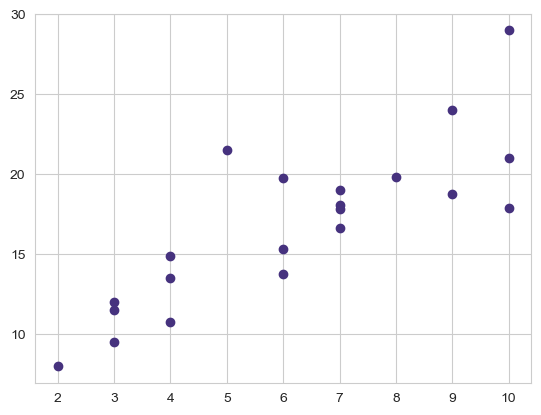

In [11]:
sns.set_style(style='whitegrid')

sns.set_palette('viridis')

plt.scatter(delivery['Sorting_Time'], delivery['Delivery_Time'])
plt.show()

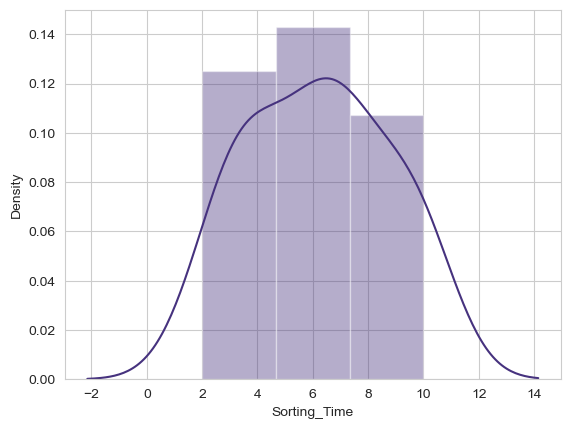

In [12]:
sns.distplot(delivery['Sorting_Time'])
plt.show()

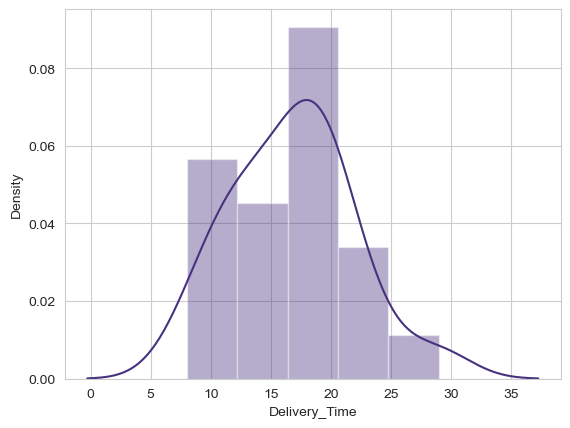

In [13]:
sns.distplot(delivery['Delivery_Time'])
plt.show()

### Correlation Analysis

In [14]:
corr = delivery.corr()
corr

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


### Pair plot

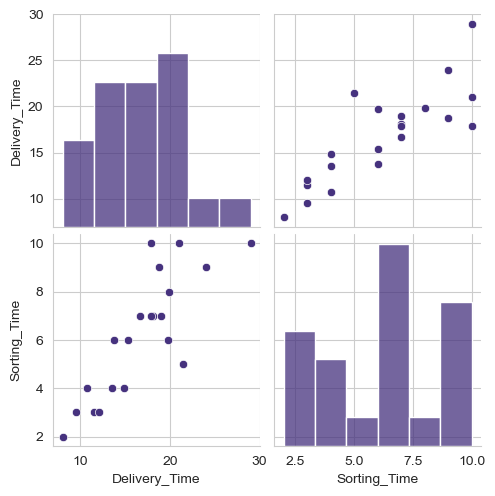

In [15]:
sns.pairplot(delivery)
plt.show()

### Heatmap

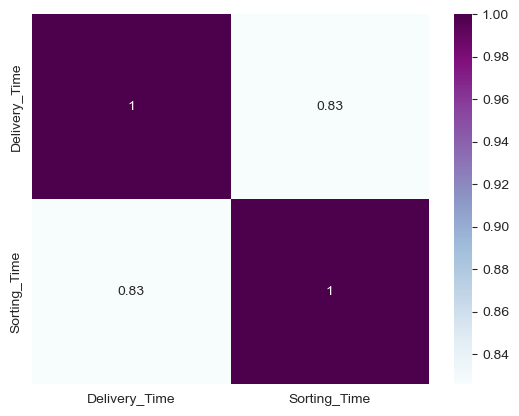

In [16]:
sns.heatmap(corr, cmap='BuPu', annot=True)
plt.show()

### Regression plot

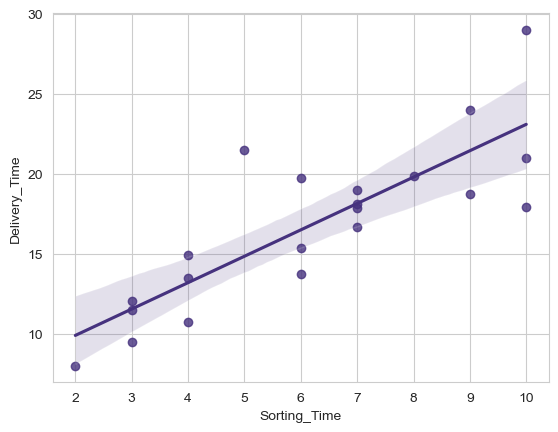

In [17]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=delivery)
plt.show()

### Building and training the model

In [18]:
import statsmodels.formula.api as smf

In [19]:
delivery_model =smf.ols('Delivery_Time ~ Sorting_Time', data=delivery).fit()

In [20]:
delivery_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        21:24:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
delivery_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
delivery_model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [23]:
delivery_model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

**since pvalues are less than significance level, we reject null hypothesis, hence Sorting_Time is a good predictor of Delivery_Time**

In [24]:
delivery_model.rsquared, delivery_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**since we have low rsquared value, we will check for errors**

In [45]:
mse = delivery_model.mse_resid
mse

8.613660132645544

In [46]:
rmse = np.sqrt(delivery_model.mse_resid)
rmse

2.9349037688901394

### Measure of error

### Test for normality of residuals using qq-plot

In [25]:
delivery_model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [26]:
import statsmodels.api as sm

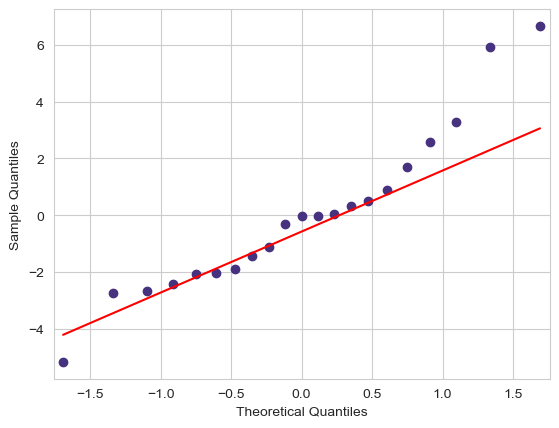

In [27]:
sm.qqplot(delivery_model.resid, line='q')
plt.show()

### Test for homoscedasicity

In [28]:
def std_value(vals):
    return (vals-vals.mean())/vals.std()

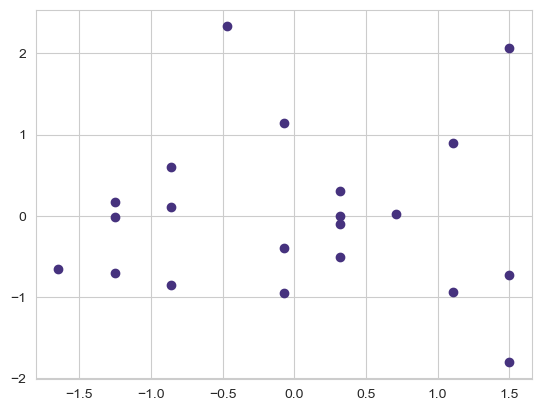

In [29]:
plt.scatter(std_value(delivery_model.fittedvalues),
           std_value(delivery_model.resid))
plt.show()

### Regression plot for residuals

eval_env: 1


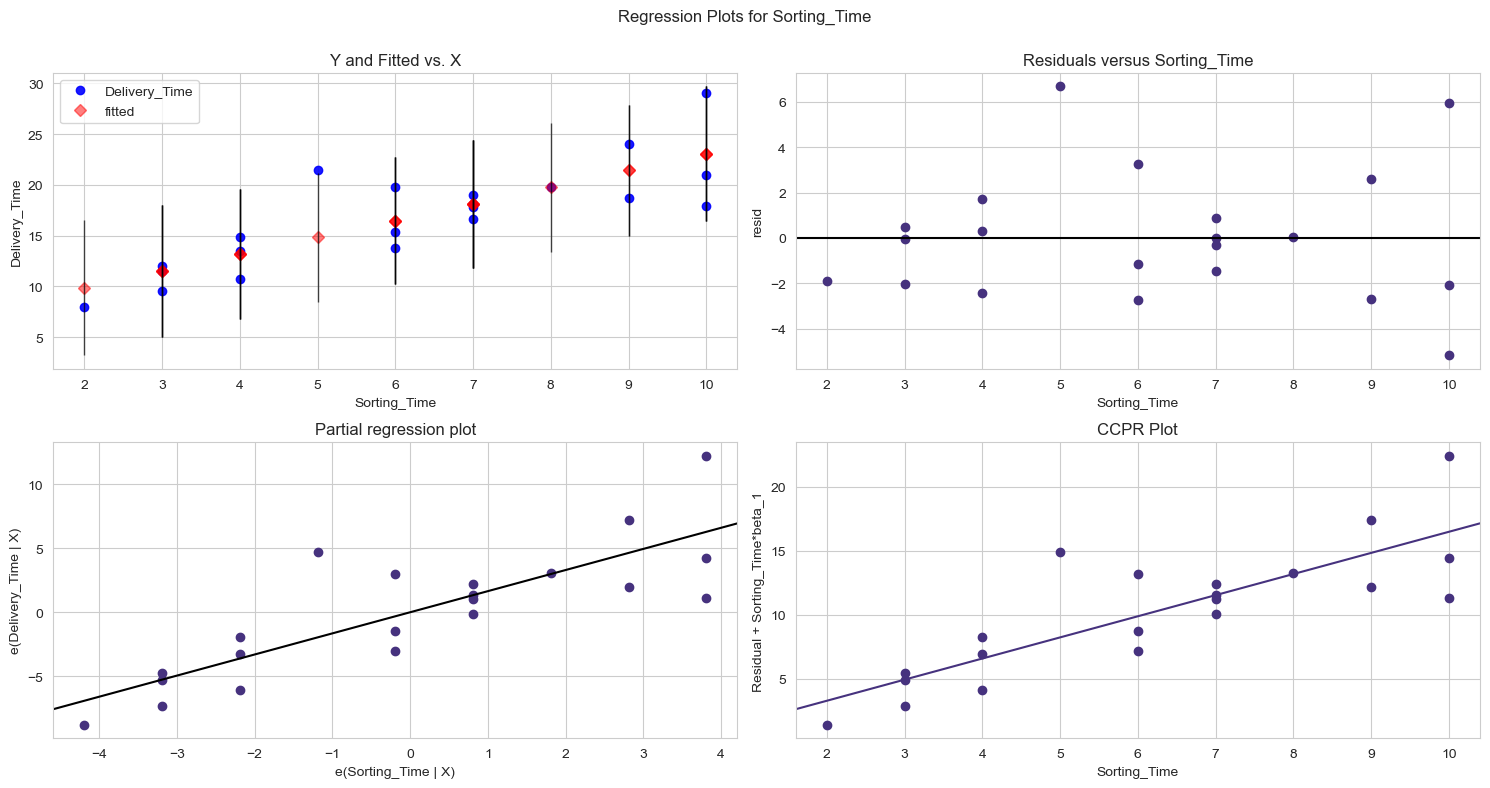

In [30]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(delivery_model, 'Sorting_Time', fig=fig)
plt.show()

### Model detection diagnostics

#### Cook's distance

In [31]:
(c,_)= delivery_model.get_influence().cooks_distance

In [32]:
np.argmax(c), np.max(c)

(4, 0.4620530412650319)

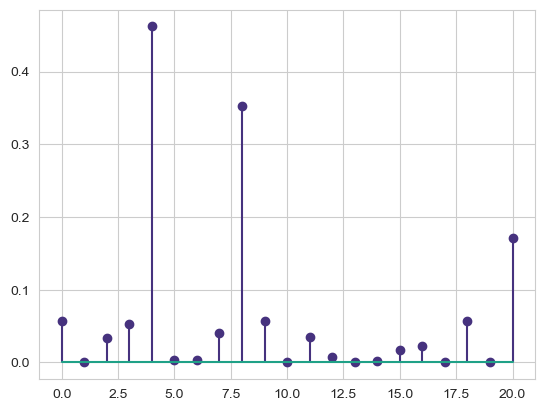

In [33]:
plt.stem(np.arange(len(delivery)), np.round(c,3))
plt.show()

**since the cooks distance is below 1 [i.e 0.46], then there is no high influential data points.
hence the above model is proved to be good model to predict the delivery time**

### Predict the test data using model

In [34]:
test_delivery = pd.DataFrame({
    'Sorting_Time':[6,12]
})
test_delivery

,Sorting_Time
0,6
1,12


In [35]:
delivery_model.predict(test_delivery)

0    16.476853
1    26.370973
dtype: float64

In [36]:
delivery_model.predict(delivery.iloc[0:8,1])

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
5    16.476853
6    18.125873
7    11.529794
dtype: float64